In [1]:
# env: pycodex_250920
import matplotlib.pyplot as plt
from pyqupath.tiff import TiffZarrReader
import numpy as np

from pycodex.visualization.multiplex import create_rgb_multiplex
from pycodex.visualization.utils import ax_plot_legend, ax_plot_rgb_with_scalebar

# 01. Plot Multiplexed Image

In [2]:
reader = TiffZarrReader.from_ometiff("../demo/data/segmentation/reg001/reg001.ome.tiff")
img_dict = reader.zimg_dict

{marker: img_dict[marker].shape for i, marker in enumerate(img_dict) if i < 5}

{'H&E_R': (1000, 1000),
 'H&E_G': (1000, 1000),
 'H&E_B': (1000, 1000),
 'dst_register': (1000, 1000),
 'src_register': (1000, 1000)}

In [3]:
markers_to_plot = [
    "DAPI",
    "CD3e",
    "CD4",
    "CD8",
    # "CD68",
    # "CD163",
    "NaKATP",
]

marker_color_dict = {
    "DAPI": "#999999",
    "CD3e": "#2CA02C",
    "CD4": "#007BFF",
    "CD8": "#D62728",
    "CD68": "#d817e6",
    "CD163": "#17e6bc",
    "NaKATP": "#FF7F0E",
}

percentile_ll = 1
percentile_ul = 99
marker_cutoff_dict = {
    marker: [
        np.percentile(img_dict[marker], percentile_ll),
        np.percentile(img_dict[marker], percentile_ul),
    ]
    for marker in markers_to_plot
}
marker_cutoff_dict

{'DAPI': [90.0, 11815.0],
 'CD3e': [0.0, 15672.0],
 'CD4': [0.0, 72.0],
 'CD8': [0.0, 360.0],
 'NaKATP': [0.0, 10967.01000000001]}

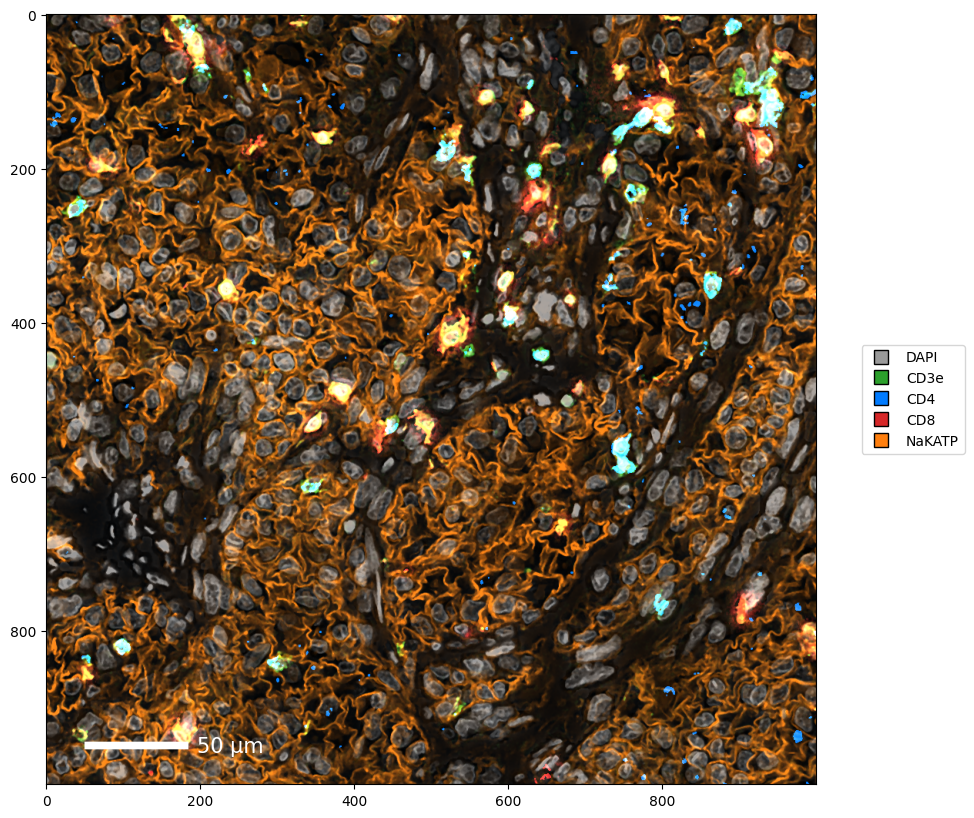

In [4]:
rgb_composite = create_rgb_multiplex(
    img_dict,
    marker_color_dict,
    markers_to_plot=markers_to_plot,
    marker_cutoff_dict=marker_cutoff_dict,
    blend_mode="add",
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax_plot_rgb_with_scalebar(
    rgb_composite,
    mpp=0.37,
    bar_width_um=50,
    bar_height_px=10,
    color_rgb=(255, 255, 255),
    text_unit="μm",
    text_size=15,
    text_to_bar_px=10,
)
ax_plot_legend({marker: marker_color_dict[marker] for marker in markers_to_plot})